# FINAL REPORT

## **Analyzing the Impact of Danceability and Energy on Spotify Song Success**

### INTRODUCTION

Music influences diverse aspects of human life and behaviour. Music streaming services, like spotify, have revolutionized the manner in which people consume music by providing a vast assortment of artists encompassing various genres and artistic origins. The question of what makes a song popular in this digital age has intrigued both music enthusiasts and researchers alike. Among the numerous factors contributing to a song's success, two key elements—danceability and energy—emerge as potential influencers. 

This project seeks to explore the statistical relationship between a song's danceability, energy, and its popularity on Spotify. We will be focusing on a dataset called "Top Spotify Songs 2023" available on KAGGLE. This dataset holds information on various Spotify songs, their artists, where they rank, and various other features like the year of release, tempo, energy, and danceability. Spotify is one of the world's leading music streaming service providers, with over 345 million users, including 155 million subscribers, across 178 countries.

#### Question: "Does the danceability and energy of a song contribute to its popularity on Spotify?"

The variables being examined in our research are danceability and energy, which are both continuous measures that range from low to high values. These features include certain musical components.
Danceability refers to the rhythmic components of a song that prompt physical movement and foster active participation from the listener. It encompasses elements like as tempo and rhythmic patterns, which determine a song's appropriateness for dancing or eliciting a physical reaction. Energy, however, comprises the strength and passion expressed in a musical performance. The track's emotional vitality, dynamics, and overall effect are reflected, which in turn influence the perceptions and engagement levels of listeners.
Both of them are believed to have an impact on audience preferences in modern digital environment.

##### Local Parameter: Mean

By computing the average danceability and energy ratings, we obtain a unique value that signifies the typical or average level of these characteristics among the songs in the dataset. This value serves as a crucial benchmark, enabling us to assess the overall patterns of rhythm and energy in the music accessible on Spotify. Analyzing the average danceability and energy ratings of songs or categories allows us to detect patterns or differences in musical attributes. 


##### Scale Parameter: Standard Deviation

The standard deviation quantifies the spread or dispersion of data points around the mean. In the context of danceability and energy ratings, it indicates how much individual song ratings deviate from the average within the dataset. Analyze the variability in danceability and energy ratings to gain a deeper understanding of the range of musical characteristics that influence the popularity of a song. It offers a measure of how much the popularity varies among songs within the same level of danceability or energy.

Through the mean, we aim to understand the average danceability and energy ratings of songs, providing insights into the predominant characteristics seen in the Spotify collection. Meanwhile, the standard deviation enables us to explore in further detail the extent to which these features vary and how this variation is connected to the popularity of a song.

### METHODS AND RESULTS

Before we begin, it's important to note that as defined in our project proposal, here are the two hypotheses:

**Null Hypothesis (H<sub>0</sub>):** There is no difference in the mean streaming count between different levels of danceability and energy.

**Alternative Hypothesis (H<sub>A</sub>):** There is a significant difference in the mean streaming count between different levels of danceability and energy.

First we have to load in the necessary libraries, read in the original data from the internet, and clean the data. The cleaned data is found in `spotify`.

In [99]:
# Load necessary libraries for data manipulation, visualization, and statistical analysis
library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)
library(broom)
set.seed(123) # set.seed function to ensure reproducibility 

# Reading the Spotify dataset from an external source (Google Drive link) 
spotify_original <- read_csv("https://drive.google.com/uc?export=download&id=1UQy2DuHB0IszFK4ZVgA20xDIWBHI4eTe")

# Preprocessing the Spotify data
spotify <- spotify_original %>%
    select("track_name", "streams", "danceability_%", "energy_%") %>%
    rename("danceability" = "danceability_%", "energy" = "energy_%") %>%
    mutate(streams = as.double(streams) / 1000000,
           danceability = as.integer(danceability), 
           energy = as.integer(energy)) %>%
    filter(if_all(everything(), ~!is.na(.)))

Rows: 953 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): track_name, artist(s)_name, streams, key, mode
dbl (17): artist_count, released_year, released_month, released_day, in_spot...
num  (2): in_deezer_playlists, in_shazam_charts

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `streams = as.double(streams)/1e+06`.
Caused by warning:
! NAs introduced by coercion”


Now, we're turning the energy and danceability columns into categorical variables, with each of energy and danceability being either high or low in equal proportion. These changes are implemented in a new object called `spotify_categorized`. 

In [100]:
# Calculate the median of the 'energy' values in the Spotify dataset
half_boundary_energy <- spotify %>%
    select(energy) %>%
    pull() %>%
    quantile(1/2)


# Calculate the median of the 'danceability' values in the Spotify dataset
half_boundary_danceability <- spotify %>%
    select(danceability) %>%
    pull() %>%
    quantile(1/2)

# Categorize the 'energy' and 'danceability' in the Spotify dataset into 'Low' and 'High' based on the median
spotify_categorized <- spotify %>%
    mutate(energy = cut(energy, breaks = c(0, half_boundary_energy, Inf), 
                                  labels = c("Low Energy", "High Energy")),
           danceability = cut(danceability, breaks = c(0, half_boundary_danceability, Inf), 
                                  labels = c("Low Danceability", "High Danceability")))

This is the preliminary results section that was found in the project proposal. It simply gives a visual representation of the distributions of streams, energy, and danceability in `combined_plot_hist` and it compares streams to each of those two variables in `combined_plot_scatter` as well so that we can eyeball how they might correlate.

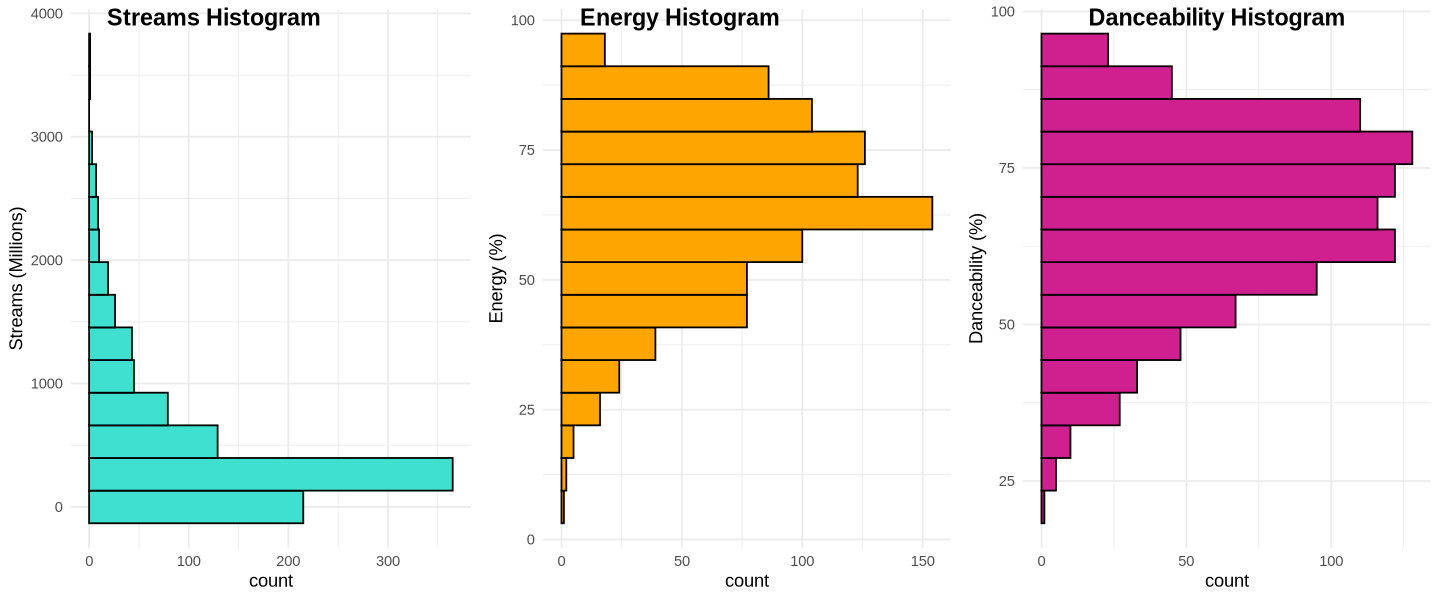

In [101]:
options(repr.plot.width = 12, repr.plot.height = 5)

# Create a scatter plot of danceability vs streams
spotify_vis_danceability_streams <- spotify %>%
    ggplot(aes(x = danceability, y = streams)) +
      geom_point(alpha = 0.6, shape = 16, color = "blue") + # Adjusted transparency and color of points
      labs(
        x = "Danceability (%)", 
        y = "Streams (Millions)", 
        caption = "Source: Spotify Data" # Adding a caption
      ) +
      theme_minimal(base_size = 14) + # Minimal theme with adjusted base size
      theme(
        plot.title = element_text(hjust = 0.5, size = 18, face = "bold"), # Centering and styling the title
        axis.title = element_text(size = 16, face = "bold"), # Styling axis titles
        axis.text = element_text(size = 14), # Styling axis text
        plot.caption = element_text(size = 10) # Styling the caption
      ) +
      scale_x_continuous(labels = scales::percent_format(scale = 1)) # Formatting the x-axis labels as percentages

# Create a scatter plot of energy vs streams
spotify_vis_energy_streams <- spotify %>%
    ggplot(aes(x = energy, y = streams)) +
      geom_point(alpha = 0.6, shape = 16, color = "forest green") + # Adjusted transparency and color of points
      labs(
        x = "Energy (%)", 
        y = "Streams (Millions)", 
        caption = "Source: Spotify Data" # Adding a caption
      ) +
      theme_minimal(base_size = 14) + # Minimal theme with adjusted base size
      theme(
        plot.title = element_text(hjust = 0.5, size = 18, face = "bold"), # Centering and styling the title
        axis.title = element_text(size = 16, face = "bold"), # Styling axis titles
        axis.text = element_text(size = 14), # Styling axis text
        plot.caption = element_text(size = 10) # Styling the caption
      ) +
      scale_x_continuous(labels = scales::percent_format(scale = 1)) # Formatting the x-axis labels as percentages

# Create a histogram of energy
spotify_vis_energy <- spotify %>%
    ggplot(aes(y = energy)) +
        geom_histogram(bins = 15, fill = "orange", linewidth = 0.5, color = "black") +
        ylab("Energy (%)") +
        theme_minimal()


# Create a histogram of danceability
spotify_vis_danceability <- spotify %>%
    ggplot(aes(y = danceability)) +
        geom_histogram(bins = 15, fill = "violet red", linewidth = 0.5, color = "black") +
        ylab("Danceability (%)") +
        theme_minimal()

# Create a histogram of streams
spotify_vis_streams <- spotify %>%
    ggplot(aes(y = streams)) +
        geom_histogram(bins = 15, fill = "turquoise", linewidth = 0.5, color = "black") +
        ylab("Streams (Millions)") +
        theme_minimal()

# Combine scatter plots into one grid
combined_plot_scatter <- plot_grid(spotify_vis_danceability_streams, spotify_vis_energy_streams, 
                                   labels = c("Danceability vs Streams", "Energy vs Streams"), ncol = 1)

# Combine histograms into one grid
combined_plot_hist <- plot_grid(spotify_vis_streams, spotify_vis_energy, spotify_vis_danceability,
                                labels = c("Streams Histogram", "Energy Histogram", 
                                           "Danceability Histogram"), ncol = 3)

combined_plot_hist

Figure 1,2,3: Combined Histogram ("Streams Histogram", "Energy Histogram","Danceability Histogram")

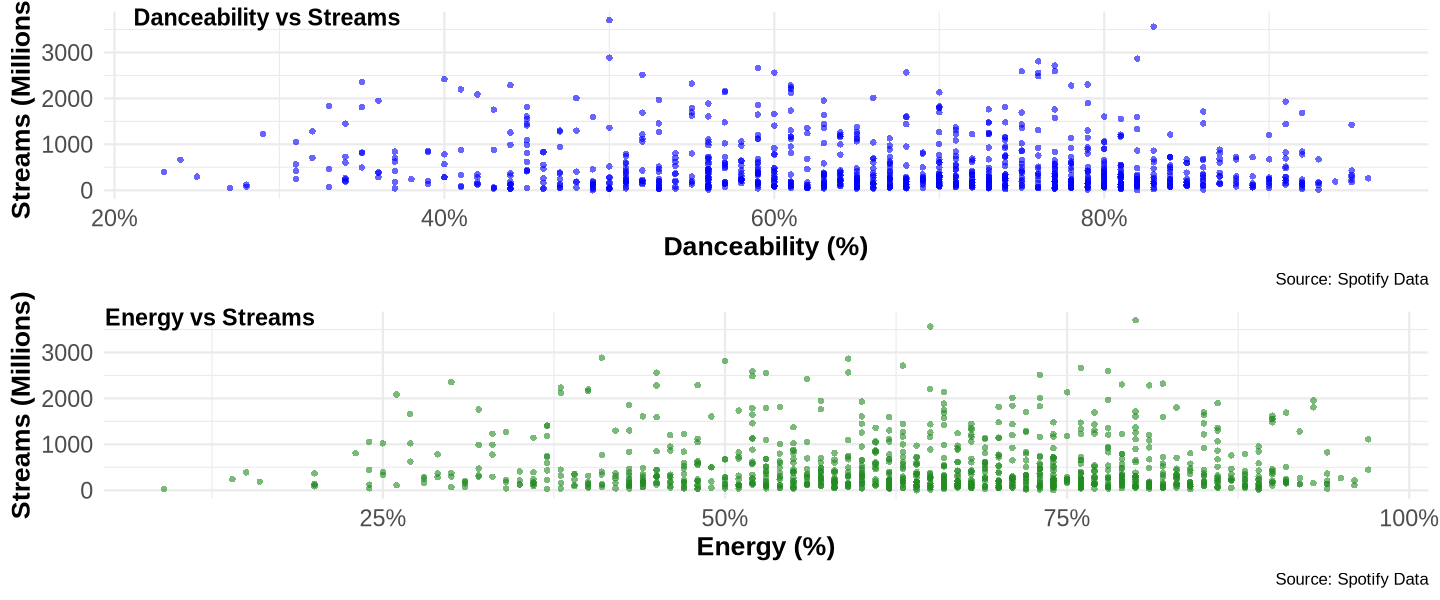

In [102]:
combined_plot_scatter

Figure 4,5: Scatter Plot ("Danceability vs Streams", "Energy vs Streams")

These visualizations show that the distributions of all three columns are fairly skewed, with the streams column being especially concentrated on the lower end. Additionally, the scatter plots comparing streams to energy and danceability are not conclusive on there own and don't reveal much about the data. Additional analysis will be required.

To get a basic numerical representation of these scatter plots, I created a table showing the mean, standard deviation, and variance of each category (high energy/low energy or high danceability/low danceability) compared to the streams.

In [103]:
# Group the Spotify data by 'energy' and calculate summary statistics for 'streams'
streams_energy <- spotify_categorized %>%
    group_by(energy) %>%
    summarize(mean_streams = mean(streams),
              standard_deviation_streams = sd(streams),
              variance_streams = var(streams))

# Group the Spotify data by 'danceability' and calculate summary statistics for 'streams'
streams_danceability <- spotify_categorized %>%
    group_by(danceability) %>%
    summarize(mean_streams = mean(streams),
              standard_deviation_streams = sd(streams),
              variance_streams = var(streams))

# summary statistics for 'streams' grouped by 'energy
streams_energy

energy,mean_streams,standard_deviation_streams,variance_streams
<fct>,<dbl>,<dbl>,<dbl>
Low Energy,533.0476,591.7409,350157.3
High Energy,493.6548,538.5070,289989.8


Table 1: Summary statistics for 'streams' grouped by 'energy'

In [104]:
streams_danceability

danceability,mean_streams,standard_deviation_streams,variance_streams
<fct>,<dbl>,<dbl>,<dbl>
Low Danceability,555.0518,597.3977,356884.1
High Danceability,472.3544,531.2570,282234.0


Table 2: Summary statistics for 'streams' grouped by 'danceability'

Interestingly, these tables seem to suggest that songs with lower energy might statistically have lower streams than songs with higher energy, with the same being true for danceability. This is not at all what we expected. Additionally, the variances of each of the categories are not many times greater or less than each other, and as such they can be treated as having equal variances for the purposes of conducting t-tests.

Next, we took bootstrap distributions of the mean streams of songs in both values (high/low) of each category (energy/danceability), and found 95% confidence intervals for each of them.

In [105]:
# Bootstrapping for streams with low energy
streams_bootstrap_means_low_energy <- spotify_categorized %>%
    filter(energy == "Low Energy") %>%
    specify(response = streams) %>%
    generate(reps = 4000, type = "bootstrap") %>%
    calculate(stat = "mean")

# Calculate the 95% confidence interval for low energy streams
streams_ci_low_energy <- streams_bootstrap_means_low_energy %>%
    get_ci(level = 0.95, type = "percentile") %>%
    mutate(category = "Low Energy")

# Histogram visualization for bootstrapped means of low energy streams
streams_bootstrap_means_hist_low_energy <- streams_bootstrap_means_low_energy %>%
    ggplot(aes(x = stat)) + 
    geom_histogram(bins = 30, fill = "lavender", color = "black") + # Adding colors and borders to the bins
    annotate("rect", 
             xmin = -Inf, 
             xmax = streams_ci_low_energy %>% pull(lower_ci), 
             ymin = -Inf, 
             ymax = Inf, 
             fill = "red", 
             alpha = 0.2) +
    annotate("rect", 
             xmin = streams_ci_low_energy %>% pull(upper_ci), 
             xmax = Inf, 
             ymin = -Inf, 
             ymax = Inf, 
             fill = "red", 
             alpha = 0.2) +
    ggtitle("Low Energy Streams Sampling Distribution of Bootstrap Means") +
    labs(x = "Mean", y = "Count") +
    theme_minimal(base_size = 20) + # Minimal theme with larger base text size
    theme(
        plot.title = element_text(hjust = 0.5, size = 24, face = "bold"), # Centering and styling the title
        axis.title = element_text(size = 22, face = "bold"), # Styling axis titles
        axis.text = element_text(size = 18) # Styling axis text
    )

# Histogram visualization for bootstrapped means of high energy streams
streams_bootstrap_means_high_energy <- spotify_categorized %>%
    filter(energy == "High Energy") %>%
    specify(response = streams) %>%
    generate(reps = 4000, type = "bootstrap") %>%
    calculate(stat = "mean")

streams_ci_high_energy <- streams_bootstrap_means_high_energy %>%
    get_ci(level = 0.95, type = "percentile") %>%
    mutate(category = "High Energy")

streams_bootstrap_means_hist_high_energy <- streams_bootstrap_means_high_energy %>%
    ggplot(aes(x = stat)) + 
    geom_histogram(bins = 30, fill = "light yellow", color = "black") + # Adding colors and borders to the bins
    annotate("rect", 
             xmin = -Inf, 
             xmax = streams_ci_high_energy %>% pull(lower_ci), 
             ymin = -Inf, 
             ymax = Inf, 
             fill = "red", 
             alpha = 0.2) +
    annotate("rect", 
             xmin = streams_ci_high_energy %>% pull(upper_ci), 
             xmax = Inf, 
             ymin = -Inf, 
             ymax = Inf, 
             fill = "red", 
             alpha = 0.2) +
    ggtitle("High Energy Streams Sampling Distribution of Bootstrap Means") +
    labs(x = "Mean", y = "Count") +
    theme_minimal(base_size = 20) + # Minimal theme with larger base text size
    theme(
        plot.title = element_text(hjust = 0.5, size = 24, face = "bold"), # Centering and styling the title
        axis.title = element_text(size = 22, face = "bold"), # Styling axis titles
        axis.text = element_text(size = 18) # Styling axis text
    )

# Histogram visualization for bootstrapped means of low danceability streams
streams_bootstrap_means_low_danceability <- spotify_categorized %>%
    filter(danceability == "Low Danceability") %>%
    specify(response = streams) %>%
    generate(reps = 4000, type = "bootstrap") %>%
    calculate(stat = "mean")

streams_ci_low_danceability <- streams_bootstrap_means_low_danceability %>%
    get_ci(level = 0.95, type = "percentile") %>%
    mutate(category = "Low Danceability")

streams_bootstrap_means_hist_low_danceability <- streams_bootstrap_means_low_danceability %>%
    ggplot(aes(x = stat)) + 
    geom_histogram(bins = 30, fill = "indian red", color = "black") + # Adding colors and borders to the bins
    annotate("rect", 
             xmin = -Inf, 
             xmax = streams_ci_low_danceability %>% pull(lower_ci), 
             ymin = -Inf, 
             ymax = Inf, 
             fill = "red", 
             alpha = 0.2) +
    annotate("rect", 
             xmin = streams_ci_low_danceability %>% pull(upper_ci), 
             xmax = Inf, 
             ymin = -Inf, 
             ymax = Inf, 
             fill = "red", 
             alpha = 0.2) +
    ggtitle("Low Danceability Streams Sampling Distribution of Bootstrap Means") +
    labs(x = "Mean", y = "Count") +
    theme_minimal(base_size = 20) + # Minimal theme with larger base text size
    theme(
        plot.title = element_text(hjust = 0.5, size = 24, face = "bold"), # Centering and styling the title
        axis.title = element_text(size = 22, face = "bold"), # Styling axis titles
        axis.text = element_text(size = 18) # Styling axis text
    )

# Histogram visualization for bootstrapped means of high danceability streams
streams_bootstrap_means_high_danceability <- spotify_categorized %>%
    filter(danceability == "High Danceability") %>%
    specify(response = streams) %>%
    generate(reps = 4000, type = "bootstrap") %>%
    calculate(stat = "mean")

streams_ci_high_danceability <- streams_bootstrap_means_high_danceability %>%
    get_ci(level = 0.95, type = "percentile") %>%
    mutate(category = "High Danceability")

streams_bootstrap_means_hist_high_danceability <- streams_bootstrap_means_high_danceability %>%
    ggplot(aes(x = stat)) + 
    geom_histogram(bins = 30, fill = "light blue", color = "black") + # Adding colors and borders to the bins
    annotate("rect", 
             xmin = -Inf, 
             xmax = streams_ci_high_danceability %>% pull(lower_ci), 
             ymin = -Inf, 
             ymax = Inf, 
             fill = "red", 
             alpha = 0.2) +
    annotate("rect", 
             xmin = streams_ci_high_danceability %>% pull(upper_ci), 
             xmax = Inf, 
             ymin = -Inf, 
             ymax = Inf, 
             fill = "red", 
             alpha = 0.2) +
    ggtitle("High Danceability Streams Sampling Distribution of Bootstrap Means") +
    labs(x = "Mean", y = "Count") +
    theme_minimal(base_size = 20) + # Minimal theme with larger base text size
    theme(
        plot.title = element_text(hjust = 0.5, size = 24, face = "bold"), # Centering and styling the title
        axis.title = element_text(size = 22, face = "bold"), # Styling axis titles
        axis.text = element_text(size = 18) # Styling axis text
    )

# Combine confidence intervals for all categories into one dataset for easy comparison
ci <- bind_rows(streams_ci_low_energy, streams_ci_high_energy, streams_ci_low_danceability, streams_ci_high_danceability) %>%
    select(category, everything())

ci

category,lower_ci,upper_ci
<chr>,<dbl>,<dbl>
Low Energy,482.5988,585.9996
High Energy,446.2033,544.1365
Low Danceability,503.3263,607.8576
High Danceability,427.9979,520.3602


Table 3

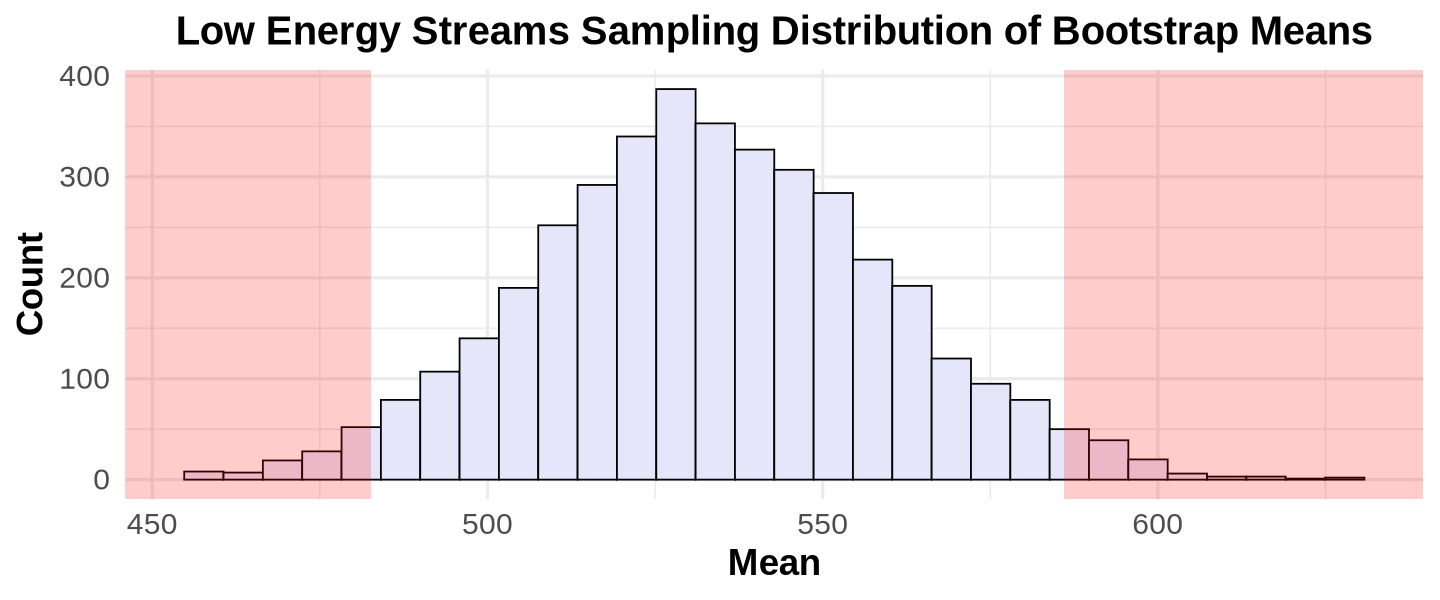

In [106]:
streams_bootstrap_means_hist_low_energy

Figure 6: Low Energy Streams Sampling Distribution of Bootstrap Means

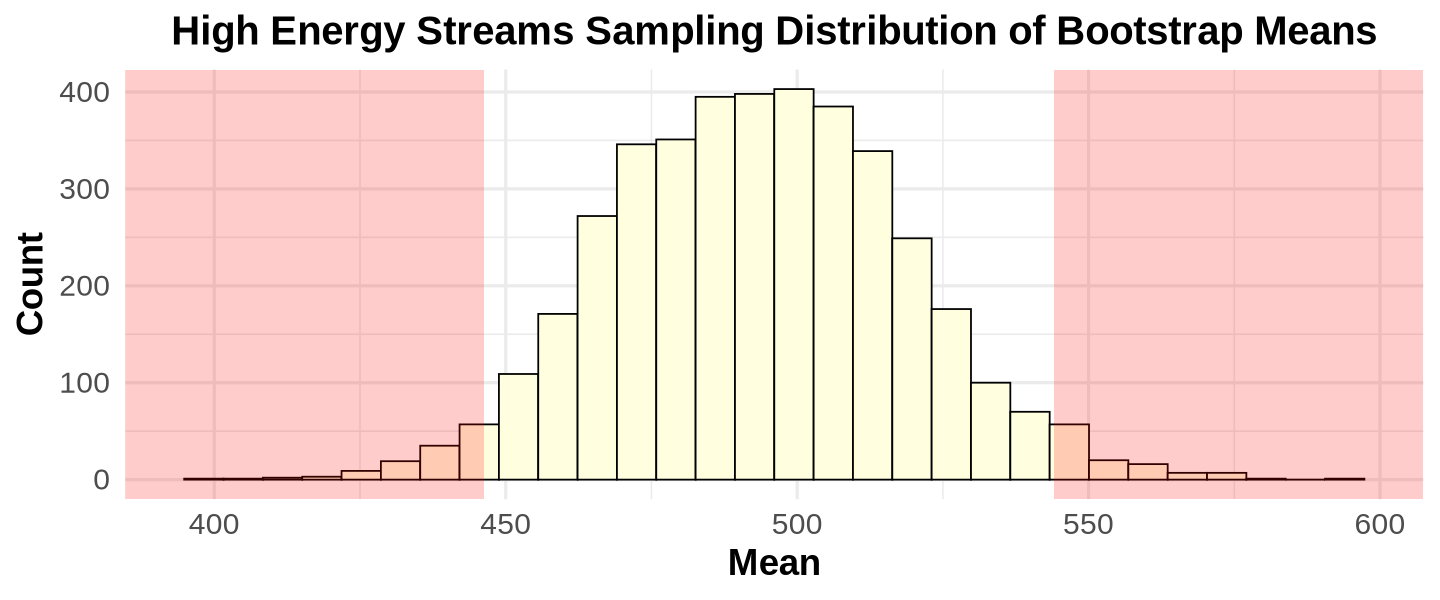

In [107]:
streams_bootstrap_means_hist_high_energy

Figure 7: High Energy Streams Sampling Distribution of Bootstrap Means

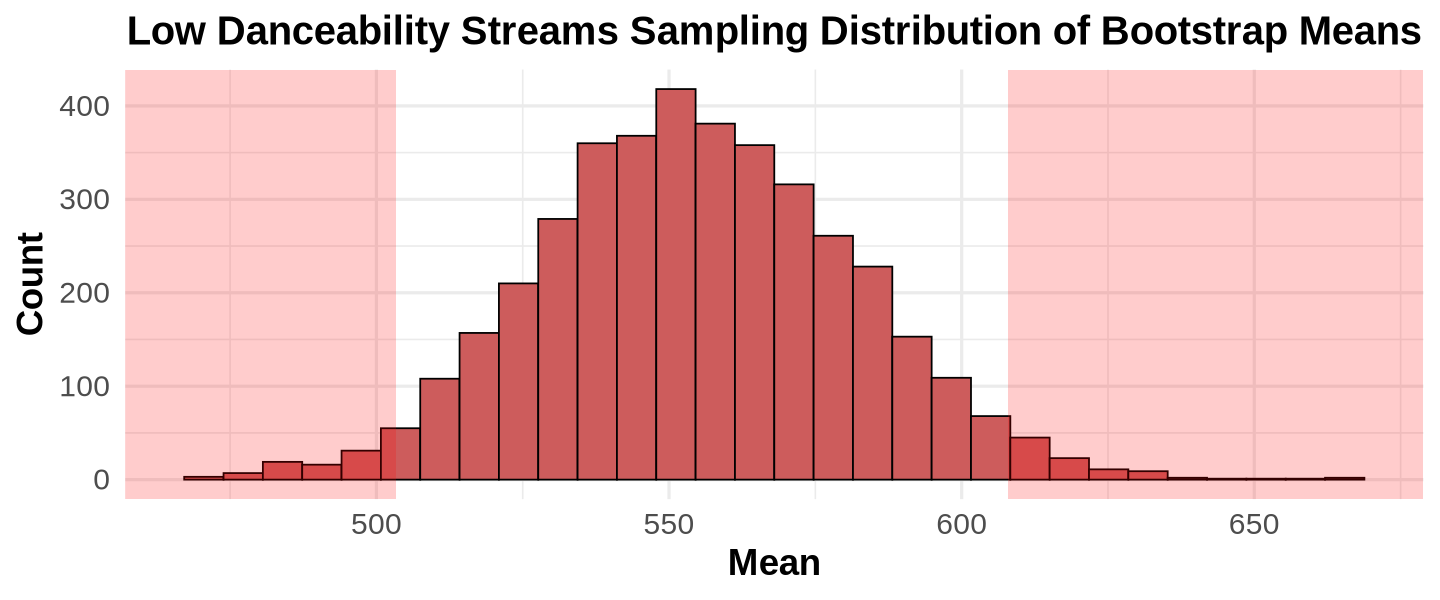

In [108]:
streams_bootstrap_means_hist_low_danceability

Figure 8: Low Danceability Streams Sampling Distribution of Bootstrap Means

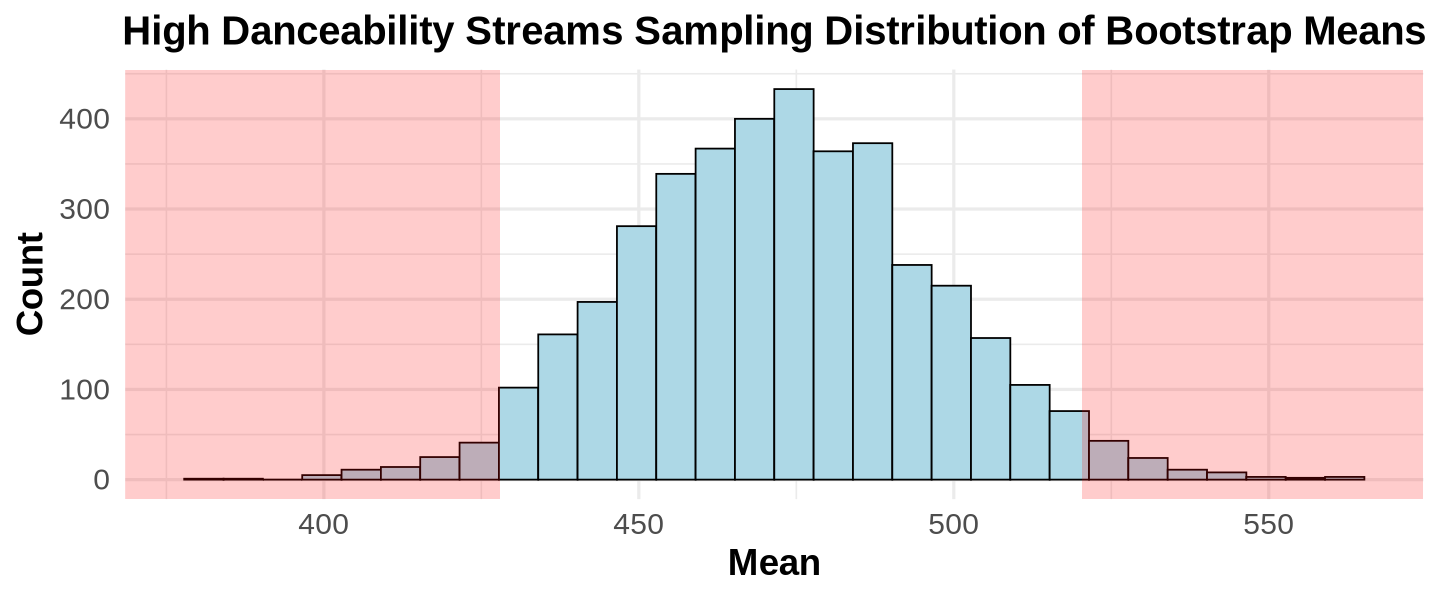

In [109]:
streams_bootstrap_means_hist_high_danceability

Figure 9: High Danceability Streams Sampling Distribution of Bootstrap Means

Again, here we see a trend toward low energy or low danceability songs getting more streams then their high energy equivalents, but this visual analysis is not enough to come to a statistical conclusion.

One of the most rigorous test we can perform is a two-sample t-test, which we can use to compare the means between low and high energy, as well as the means between low and high danceability. In our project proposal, we defined our alpha value at 0.05.

In [110]:
# Perform a t-test for danceability
danceability_t_test <- 
   t.test(streams ~ danceability, data = spotify_categorized, 
              var.equal = TRUE) %>% 
  tidy()

# Extract the p-value from the danceability t-test results
danceability_p_value <- danceability_t_test %>%
    pull(p.value)

# Perform a t-test for energy
energy_t_test <- 
   t.test(streams ~ energy, data = spotify_categorized, 
              var.equal = TRUE) %>% 
  tidy()

# Extract the p-value from the energy t-test results
energy_p_value <- energy_t_test %>%
    pull(p.value)

# Create a tibble (data frame) to summarize the results
results <- tibble(category = c("Energy", "Danceability"), 
                  p_value = c(energy_p_value, danceability_p_value), 
                  alpha = c(0.05, 0.05), 
                  reject_null_hypothesis = p_value < alpha)

# results
cat("Energy t-test results:")
energy_t_test

Energy t-test results:

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39.39278,533.0476,493.6548,1.07132,0.2842978,950,-32.76768,111.5532,Two Sample t-test,two.sided


Table 4: Energy t-test results

In [111]:
cat("\nDanceability t-test results:")
danceability_t_test


Danceability t-test results:

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
82.69745,555.0518,472.3544,2.255352,0.02433813,950,10.73937,154.6555,Two Sample t-test,two.sided


Table 5: Danceability t-test results

In [112]:
results

category,p_value,alpha,reject_null_hypothesis
<chr>,<dbl>,<dbl>,<lgl>
Energy,0.28429777,0.05,FALSE
Danceability,0.02433813,0.05,TRUE


Table 6

Interestingly, the t-tests revealed that while danceability has a p-value lower than 0.05, suggesting a likely statistically significant relationship between danceability and streams, energy does not, suggesting that the trend towards low-energy songs we saw in the visualizations earlier may have due to random chance.

#### Bootstrapping vs Asymptotics
The use of Central Limit Theorem (CLT) can be regarded as one method of 'Asymptotics'. We will make the conclusion after comparing the p-value of both method.

##### Test Statistics
We will use the following formula to calculate the test statistics for a two-sample t-test.
$$
T = \frac{\bar{x}-\bar{y} - d_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} }
$$


In [113]:
# tables of variables needed

sum_energy <- spotify_categorized |>
    group_by(energy) |>
    summarize(mean=mean(streams),sd=sd(streams),count=n())
sum_energy

sum_danceability <- spotify_categorized |>
    group_by(danceability) |>
    summarize(mean=mean(streams),sd=sd(streams),count=n())
sum_danceability

# calculation of test statistics
energy_test_stat <- (sum_energy$mean[1]-sum_energy$mean[2])/sqrt((sum_energy$sd[1]^2)/sum_energy$count[1]+(sum_energy$sd[2])^2/sum_energy$count[2])

dance_test_stat <- (sum_danceability$mean[1]-sum_danceability$mean[2])/
sqrt((sum_danceability$sd[1])^2/sum_danceability$count[1]+(sum_danceability$sd[2])^2/sum_danceability$count[2])

energy,mean,sd,count
<fct>,<dbl>,<dbl>,<int>
Low Energy,533.0476,591.7409,495
High Energy,493.6548,538.5070,457


danceability,mean,sd,count
<fct>,<dbl>,<dbl>,<int>
Low Danceability,555.0518,597.3977,481
High Danceability,472.3544,531.2570,471


Table 7,8

##### Degree of Freedom
For simpler calculation, here we use the equation $ df=n1+n2-2$ to calculate the degree of freedom. There are 952 observations in total, so the df of both test is $952-2=950$



In [114]:
# Since both test statistics are negative and our hypothesis test are two sided,
# we multiple the result by 2

# Since both test statistics are positive and our hypothesis test are two sided,
# we set the right tail and multiple the result by 2
p_val_energy <- 2*pt(energy_test_stat,950,lower.tail = FALSE)
p_val_danceability <- 2*pt(dance_test_stat,950,lower.tail = FALSE)

p_val_sum <- data.frame(
    p_val_boostrapping = c(results$p_value[1],results$p_value[2]),
    p_val_CLT = c(p_val_energy,p_val_danceability))
rownames(p_val_sum) <- c('Energy', 'Danceability')
p_val_sum

,p_val_boostrapping,p_val_CLT
,<dbl>,<dbl>
Energy,0.28429777,0.28249072
Danceability,0.02433813,0.02416417


Table 9


In our research, we utilized two statistical methods: Bootstrapping and the Central Limit Theorem (CLT). Bootstrapping is particularly advantageous when no established formula exists for sample statistics. In contrast, theoretical interval like CLT requires specific distributional assumptions. If these assumptions are not satisfied or the sample size is not large enough, the results from such theory-based methods might not be reliable.

The choice between the two methods is made based on the assumptions that we make about our chosen sample size and on the population distribution, which we mentioned before. Since our sample size for both genres are large enough and meet the assumptions of the Central Limit Theorem, this method may be more appropriate and computationally efficient to use.

#### Conclusion on CLT Hypothesis Test
As by default we use a 5% significance level (alpha=0.05). We can make the same conclusions based on the method of CLT as the bootstrapping method: 

For the p-value of the variable `energy`, since 0.28>0.05, we fail to reject the null hypothesis that the energy levels have an equal impact on streaming counts.

For the lp-value of the variable `danceability`, since 0.024<0.05, we prefer the alternative hypothesis that danceability levels have distinct effects on streaming counts.



### DISCUSSION

- ### Implications and Impact of the Findings

    - Danceability's Impact on Song Popularity:

        - The p-value for danceability is 0.0243 (bootstrapping) & 0.0242 (CLT), which is lower than the alpha level of 0.05. This indicates that the relationship between a song's danceability and its popularity (measured in streams on Spotify) is statistically significant.

        - This finding suggests that songs with higher danceability are more likely to be popular on Spotify, aligning with the notion that tracks conducive to dancing or that elicit a physical response from listeners tend to attract more streams.


    - Energy's Influence on Song Popularity:

        - The p-value for energy is 0.284 (bootstrapping) & 0.282(CLT), above the alpha level of 0.05. This suggests that the relationship between a song's energy and its popularity on Spotify is not statistically significant.

        - This result implies that the energy of a song, which reflects its intensity and passion, might not be a key factor in determining its popularity on Spotify. The trend observed in the visualizations towards low-energy songs may not necessarily indicate a preference among listeners but could be attributed to random variation.

- ### Predictions

    - Danceability
    
        - It's often hypothesized that songs with a high danceability score are more likely to be popular, especially in the context of streaming services like Spotify that cater to a wide range of listeners, including those seeking music for social settings, workouts, or personal enjoyment. 
 
         - The significant relationship between danceability and song popularity found in your study aligns with this expectation. This could be because danceable tracks often have catchy rhythms and beats that appeal to a broad audience.
         
    - Energy
    
        - The assumption about energy might be that songs with higher energy, often characterized by faster tempos, louder volumes, and more dynamic ranges, would also be more popular. This belief could stem from the idea that high-energy songs are more engaging and can evoke stronger emotional responses.
 
         - However, your findings show that energy does not have a statistically significant impact on song popularity on Spotify. This result might be surprising to some, as it challenges the notion that more energetic songs are always more appealing to listeners. It suggests that while energy contributes to a song's character, it might not be as crucial for popularity as danceability.

- These results suggest that listeners on Spotify may prioritize the rhythm and beat of a song conducive to physical movement over the intensity and vigor of the track.
- It also highlights the complexity of musical preferences and how different elements resonate differently with audiences. 
- The diverse user base of Spotify, encompassing various age groups, cultural backgrounds, and musical tastes, might influence these results could be a potential reason for unexpected findings.



- ### Future Questions

    - These findings have implications for artists, music producers, and marketers in the music industry. 

    - It suggests that focusing on the danceability aspect of music production might be more effective in increasing a song's popularity on platforms like Spotify.However, since energy did not show a significant impact, it's possible that other factors not considered in this study also play a role in determining a song's success.
    
    - Future research could expand on these findings by exploring other variables such as lyrics, genre, artist popularity, and social media influence. Additionally, examining the interaction between danceability and other musical features could provide a more nuanced understanding of what drives song popularity.


### REFERENCES

Al-Beitawi, Z., Salehan, M., & Zhang, S. (2020). What makes a song trend? cluster analysis of musical attributes for spotify top trending songs. Journal of Marketing Development and Competitiveness, 14(3), 79-91. Retrieved from https://www.proquest.com/scholarly-journals/what-makes-song-trend-cluster-analysis-musical/docview/2444523984/se-2



Elgiriyewithana, N. (2023, September). Most Streamed Spotify Songs 2023. https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023



Vardo, L., Jerkić, J., & Žunić, E. (2023a). Predicting song success: Understanding track features and predicting popularity using Spotify Data. 2023 22nd International Symposium INFOTEH-JAHORINA (INFOTEH). https://doi.org/10.1109/infoteh57020.2023.10094172